In [4]:
# ✅ Step 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import kagglehub
import os

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/breast-cancer-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/breast-cancer-dataset


In [7]:
# ✅ Step 3: Read the dataset (assuming CSV file name is 'breast-cancer.csv')
dataset_path = os.path.join(path, "breast-cancer.csv")
df = pd.read_csv(dataset_path)

In [8]:
# ✅ Step 4: Explore and prepare data
print("Dataset Shape:", df.shape)
print("Columns:", df.columns)

# Drop any unnecessary columns if required (e.g., ID)
if 'id' in df.columns:
    df.drop(columns=['id'], inplace=True)

# Replace target labels if needed
if df['diagnosis'].dtype == 'object':
    df['diagnosis'] = df['diagnosis'].map({'M': 0, 'B': 1})

# Separate features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

Dataset Shape: (569, 32)
Columns: Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [9]:
# ✅ Step 5: Preprocessing (Scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ Step 6: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [10]:
# ✅ Step 7: Initialize Models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

In [11]:
# ✅ Step 8: Train and Evaluate
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)

    print(f"\n🔹 {name} 🔹")
    print("Accuracy:", acc)
    print("ROC AUC:", roc)
    print("Classification Report:\n", classification_report(y_test, y_pred))

    results[name] = {"Accuracy": acc, "ROC AUC": roc}


🔹 Logistic Regression 🔹
Accuracy: 0.9736842105263158
ROC AUC: 0.99737962659679
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


🔹 SVM 🔹
Accuracy: 0.9736842105263158
ROC AUC: 0.99737962659679
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


🔹 Random Forest 🔹
Accuracy: 0.9649122807017544
ROC AUC: 0.9949230265312806
Classification Report:
               precision    recall  f1-score   support


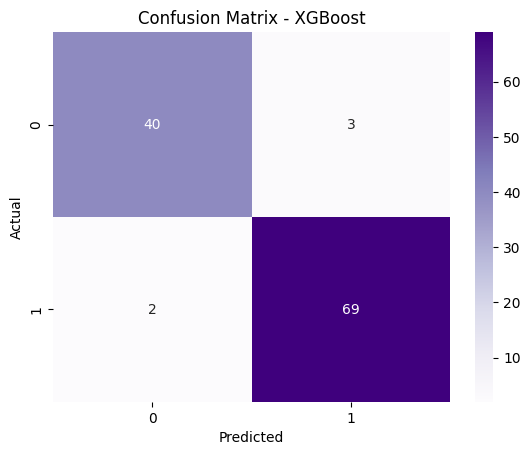

In [12]:
# ✅ Step 9: Confusion Matrix for Best Model (Example: XGBoost)
best_model = models["XGBoost"]
y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)

sns.heatmap(cm, annot=True, fmt="d", cmap="Purples")
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

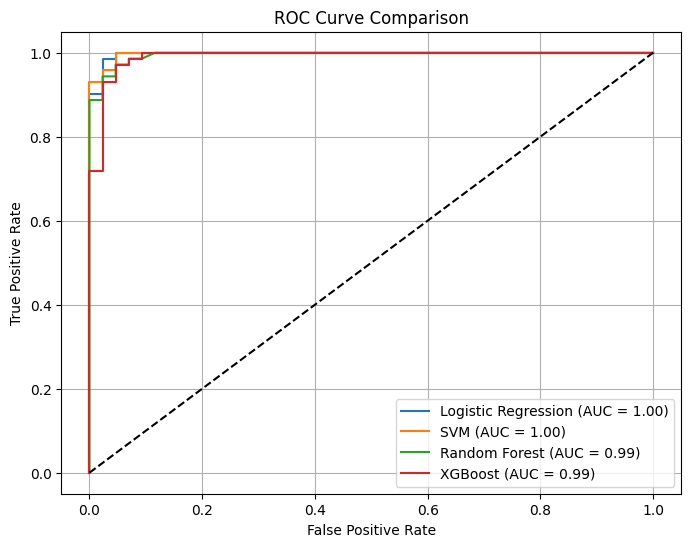

In [13]:
# ✅ Step 10: ROC Curve Comparison
plt.figure(figsize=(8, 6))
for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()